In [42]:
import numpy as np
import pickle
import os
from scipy.stats import norm
# Plotting
import matplotlib.pyplot as plt

In [167]:
def rlba(v = np.array([1, 1]), 
         A = 1, 
         b = 1.5, 
         s = 0.1,
         n_samples = 1000):
    rts = np.zeros((n_samples, 1))
    choices = np.zeros((n_samples, 1))
    
    n_choices = len(v)
    for i in range(n_samples):
        d = np.array([-0.1]*n_choices)
        while np.max(d) < 0:
            k = np.random.uniform(low = 0, high = A, size = n_choices)
            d = np.random.normal(loc = v, scale = s)
            tmp_rt = (b - k) / d
        
        rts[i] = np.min(tmp_rt)
        choices[i]  = np.argmin(tmp_rt)
    
    # Create some dics
    v_dict = {}
    for i in range(n_choices):
        v_dict['v_' + str(i)] = v[i]

    return (rts, choices, {**v_dict,
                           'A': A,
                           'b': b,
                           's': s,
                           'delta_t': 0,
                           'max_t': 1000,
                           'n_samples': n_samples,
                           'simulator': 'lba',
                           'boundary_fun_type': 'none',
                           'possible_choices': [i for i in range(n_choices)]})

In [177]:
def dlba(rt = 0.5, 
         choice = 0,
         v = np.array([1, 1]),
         A = 1,
         b = 1.5,
         s = 0.1,
         return_log = True):
    n_choices = len(v)
    l_f_t = 0
    
#     if len(s) == 1:
#         s = np.array([s[0]] * n_choices)
    
    for i in range(n_choices):
        if i == choice:
            tmp = flba(rt = rt, A = A, b = b, v = v[i], s = s)
            if tmp < 1e-29:
                tmp = 1e-29
            l_f_t += np.log(tmp)
        else:
            tmp = Flba(rt = rt, A = A, b = b, v = v[i], s = s)
            
            # numerical robustness catches
            if tmp < 1e-29:
                tmp = 1e-29
            if tmp > (1.0 - 1e-29):
                tmp = (1.0 - 1e-29)
            l_f_t += np.log(1.0 - tmp)
            
    if return_log: 
        return l_f_t
    else:
        return np.exp(l_f_t)

In [170]:
def Flba(rt = 0.5, 
         v = 1,
         A = 1,
         b = 1.5,
         s = 0.1):
    return (1 + ((1 / A) * ((b - A - (rt * v)) * norm.cdf((b - A - (rt * v)) / (rt * s))) - \
        (b - (rt * v)) * norm.cdf((b - (rt * v)) / (rt * s)) + \
                    (rt * s) * (norm.pdf((b - A - (rt * v)) / (rt * s)) - norm.pdf((b - (rt * v)) / (rt * s)))))

In [171]:
def flba(rt = 0.5, 
         v = 1,
         A = 1,
         b = 1.5,
         s = 0.1):
    return ((1 / A) * ( (-v) * norm.cdf((b - A - (rt * v)) / (rt * s)) + \
                     s * norm.pdf((b - A - (rt * v)) / (rt * s)) + \
                     v * norm.cdf((b - (rt * v)) / (rt * s)) + \
                     (-s) * norm.pdf((b - (rt * v)) / (rt * s)) ))

In [172]:
out = rlba(n_samples = 20000, v = np.array([1.5, 1]), b = 1.5, A = 1)

In [173]:
out[0][out[1] == 0] = out[0][out[1] == 0] * -1

In [77]:
import pickle
out = pickle.load(open('/media/data_cifs/afengler/tmp/lba_8085c794bf7a11e9b003530bce13c5b4.pickle', 'rb'))

In [40]:
out[0][out[1] == 0] = out[0][out[1] == 0] * (-1)

NameError: name 'f_test_vals' is not defined

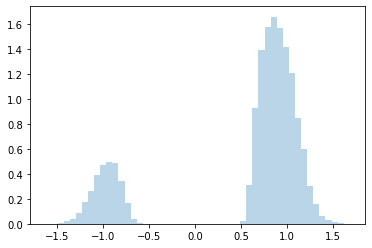

In [44]:
plt.hist(out[0], bins = 50, density = True, alpha = 0.3)
plt.plot(-my_grid, np.exp(f_test_vals[:, 0]), color = 'green')
plt.plot(my_grid, np.exp(f_test_vals[:, 1]), color = 'green')

In [43]:
my_grid = np.linspace(0.01, 2.0, 1000)

In [178]:
f_test_vals = np.zeros((len(my_grid),2))
for c in range(2):
    cnt = 0
    for i in my_grid:
        f_test_vals[cnt, c] = clba.dlba(rt = i, choice = c, v = np.array([1.5, 1]))
        cnt += 1

In [54]:
[i for i in range(4)]

[0, 1, 2, 3]

In [69]:
out

(array([[0.6368266 ],
        [0.6662889 ],
        [0.59495118],
        ...,
        [0.35798089],
        [0.57274787],
        [1.03822317]]), array([[0.],
        [1.],
        [0.],
        ...,
        [0.],
        [1.],
        [0.]]), {'v_0': 1.5,
  'v_1': 1.0,
  'A': 1,
  'b': 1.5,
  's': 0.1,
  'delta_t': 0,
  'max_t': 1000,
  'n_samples': 20000,
  'simulator': 'lba',
  'boundary_fun_type': 'none',
  'possible_choices': [0, 1]})

In [32]:
import lba
import clba
import numpy as np
import pickle
import os
import kde_training_utilities as kde_utils
import kde_class as kdec

In [86]:
#%%timeit -n 1 -r 5
out_p = lba.rlba(v = np.array([1.1657, 1.118401]), 
               A = 0.852575, 
               b = 1.860735, 
               s = 0.170644,
               n_samples = 100000)

In [87]:
#%%timeit -n 1 -r 5
out_c = clba.rlba(v = np.array([1.1657, 1.118401]), 
                A = 0.852575, 
                b = 1.860735, 
                s = 0.170644,
                ndt = 0.5,
                n_samples = 100000)

(array([2.13887378e-04, 1.06943689e-04, 5.34718446e-04, 1.81804272e-03,
        3.52914174e-03, 9.51798834e-03, 2.29928932e-02, 5.92468038e-02,
        1.22878299e-01, 2.37521934e-01, 4.11733203e-01, 5.96211067e-01,
        7.89565257e-01, 9.35864224e-01, 9.86234701e-01, 8.79932674e-01,
        5.81132007e-01, 2.06936039e-01, 2.52387106e-02, 4.27774757e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.48605824e-04,
        2.54525980e-02, 1.91215316e-01, 5.00603409e-01, 7.51172473e-01,
        8.22503913e-01, 7.69887618e-01, 6.45939883e-01, 4.69803626e-01,
        3.11526967e-01, 1.77526524e-01, 8.74799377e-02, 3.99969397e-02,
        1.82873708e-02, 6.73745242e-03, 2.45970485e-03, 9.62493202e-04,
        3.20831067e-04, 1.06943689e-04]),
 array([-2.37324441, -2.27973726, -2.1862301 , -2.09272295, -1.99921579,
        -1.90570864, 

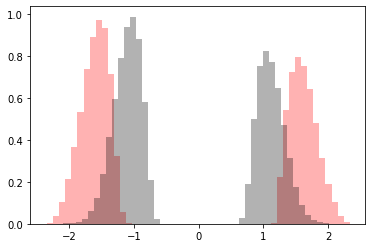

In [88]:
out_c[0][out_c[1] == 0] = out_c[0][out_c[1] == 0] * (-1)
out_p[0][out_p[1] == 0] = out_p[0][out_p[1] == 0] * (-1)

plt.hist(out_c[0], bins = 50, density = True, alpha = 0.3, color = 'red')
plt.hist(out_p[0], bins = 50, density = True, alpha = 0.3, color = 'black')

In [27]:
my_lbakde = kdec.logkde(out)

In [12]:
os.listdir('/media/data_cifs/afengler/data/kde/lba/base_simulations_20000')[0]

FileNotFoundError: [Errno 2] No such file or directory: '/media/data_cifs/afengler/data/kde/lba/base_simulations_20000'

In [28]:
kde_out = my_lbakde.kde_sample()

In [31]:
np.max(kde_out[0])

1.5138218411607995

In [53]:
out_p

(array([[1.01622899],
        [0.96866581],
        [0.92010415],
        ...,
        [0.93691211],
        [1.3230074 ],
        [0.83087953]]), array([[0.],
        [1.],
        [1.],
        ...,
        [1.],
        [0.],
        [1.]]), {'v_0': 1.1657,
  'v_1': 1.518401,
  'A': 0.852575,
  'b': 1.860735,
  's': 0.170644,
  'delta_t': 0,
  'max_t': 10000,
  'n_samples': 20000,
  'simulator': 'lba',
  'boundary_fun_type': 'none',
  'possible_choices': [0, 1]})

In [89]:
np.random.uniform(low = 0, high = 0)

0.0

In [90]:
a = [1]

In [92]:
(-1) * a[0]

-1